In [1]:
# 배열의 크기, 반복 횟수 설정
sizes = [
    100, 250, 500, 750, 
    1000, 2500, 5000, 7500, 
    10000, 25000, 50000, 75000, 
    100000, 250000, 500000, 750000,
    1000000
]  # 배열의 크기

SIZE = sizes[2] # 500
THRESHODE_RANGE = 250
iterations = 5 # 각 크기별 평균을 내기 위해 반복할 횟수

thresholds = list(range(THRESHODE_RANGE)) # threshold의 범위를 0 ~ 249까지 지정
''' 
    c로 만든 두 가지 정렬(normal Quicksort, threshold used Quicksort)의 시간을 구해 파일에 추가하는 어플리케이션을
    위 두 가지 sizes, iterations을 사용하여, 반복해서 값을 구한다.
'''
for threshold in thresholds:
    for _ in range(iterations):
        !../main.out {SIZE} {threshold}

Qiucksort: elapsed time: 0 milliseconds
threshold used Qiucksort: elapsed time: 0 milliseconds
Qiucksort: elapsed time: 0 milliseconds
threshold used Qiucksort: elapsed time: 0 milliseconds
Qiucksort: elapsed time: 0 milliseconds
threshold used Qiucksort: elapsed time: 0 milliseconds
Qiucksort: elapsed time: 0 milliseconds
threshold used Qiucksort: elapsed time: 0 milliseconds
Qiucksort: elapsed time: 0 milliseconds
threshold used Qiucksort: elapsed time: 0 milliseconds
Qiucksort: elapsed time: 0 milliseconds
threshold used Qiucksort: elapsed time: 1 milliseconds
Qiucksort: elapsed time: 0 milliseconds
threshold used Qiucksort: elapsed time: 0 milliseconds
Qiucksort: elapsed time: 0 milliseconds
threshold used Qiucksort: elapsed time: 0 milliseconds
Qiucksort: elapsed time: 0 milliseconds
threshold used Qiucksort: elapsed time: 0 milliseconds
Qiucksort: elapsed time: 0 milliseconds
threshold used Qiucksort: elapsed time: 0 milliseconds
Qiucksort: elapsed time: 0 milliseconds
threshold 

In [8]:
'''
    위에서 구한 정렬 시간을 저장한 파일을 가져와서 딕셔너리에 담는다.
'''
# 시간의 합을 저장할 딕셔너리 컨테이너
threshold_used_sort_times = {}

# c 어플리케이션 main.out으로 생성, 추가된 파일 'Quicksort_threshold.txt'를 가져와 한 줄 씩 읽는다.
with open('Quicksort_threshold.txt', 'r') as f:
    # '/n'문자을 기준으로 한 줄씩 가져와 읽는다.
    for line in f:
        size, threshold, quick_sort_time, threshold_used_sort_time = map(int, line.strip().split()) 
                                                                    # .strip(): 양쪽 '\n'문자 제거 
                                                                    # .split(): ' '를 기준으로, 토큰화
        # 딕셔너리 컨테이너에 있는지 현재 크기의 시간 데이터가 있는지 확인
        # 없으면 추가                                            
        if threshold_used_sort_times.get(threshold) == None:
            threshold_used_sort_times[threshold] = threshold_used_sort_time
        # 있으면 합쳐준다.
        else:
            threshold_used_sort_times[threshold] += threshold_used_sort_time
            
# 결과 각 sizes(N)의 배열을 정렬할 때 걸리는 시간의 합을 저장하는 딕셔너리를 얻을 수 있다.
print(f"threshold_used_sort_times: {threshold_used_sort_times}")

threshold_used_sort_times: {0: 0, 1: 1, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 1, 16: 0, 17: 1, 18: 0, 19: 0, 20: 1, 21: 0, 22: 0, 23: 1, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 1, 37: 0, 38: 0, 39: 0, 40: 0, 41: 1, 42: 0, 43: 0, 44: 0, 45: 1, 46: 0, 47: 0, 48: 0, 49: 0, 50: 1, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 1, 63: 1, 64: 0, 65: 0, 66: 0, 67: 0, 68: 2, 69: 1, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 1, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 1, 98: 1, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 1, 111: 1, 112: 1, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 1, 130: 0, 131: 0, 132: 0, 133: 0, 134: 1, 13

In [9]:
# 딕셔너리에 저장된 정렬 시간의 평균을 구하는 함수
def average(times: dict, iterations: int) -> list:
    time_average_list: list = []
    for size, sum_time in times.items():
        average: float = sum_time / iterations
        time_average_list.append(average)
    return time_average_list

In [10]:
# quick_sort_average = average(quick_sort_times, iterations)
threshold_used_sort_average = average(threshold_used_sort_times, iterations)

# print(f"quick_sort_average: {quick_sort_average}")
print(f"threshold_used_sort_average: {threshold_used_sort_average}")

threshold_used_sort_average: [0.0, 0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.4, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.2, 

/var/folders/bc/f500d0zj7m1cdn01yb_3k7bm0000gn/T/ipykernel_47735/4259833578.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


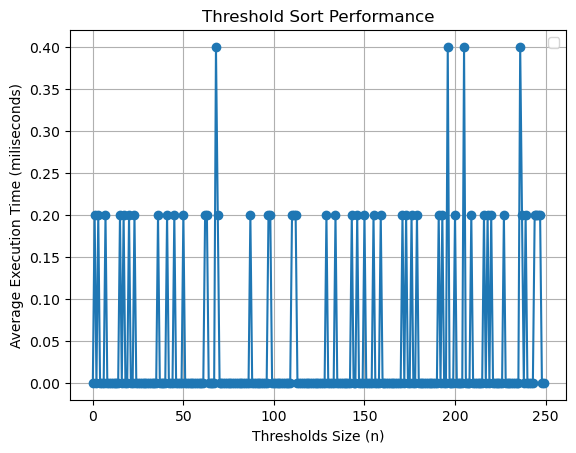

In [11]:
import matplotlib.pyplot as plt
# 데이터를 그래프로 그려주는 라이브러리 설치 필요
# 결과 그래프 그리기
'''
    그래프 정보
    배열의 크기: 500, 임계값: 0-249 반복횟수: 5       
'''
# x, y 각 데이터는 list 혹은 Numpy array 형태여야 한다.
thresholds = list(range(len(threshold_used_sort_average)))
plt.plot(thresholds, threshold_used_sort_average, marker='o')
plt.xlabel('Thresholds Size (n)')
plt.ylabel('Average Execution Time (miliseconds)')
plt.title('Threshold Sort Performance')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# 그래프의 범위를 좁혀 유의미한 임계값의 범위를 찾아간다.
thresholds = thresholds[:100] 
threshold_used_sort_average = threshold_used_sort_average[:100]

/var/folders/bc/f500d0zj7m1cdn01yb_3k7bm0000gn/T/ipykernel_47735/1508205799.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


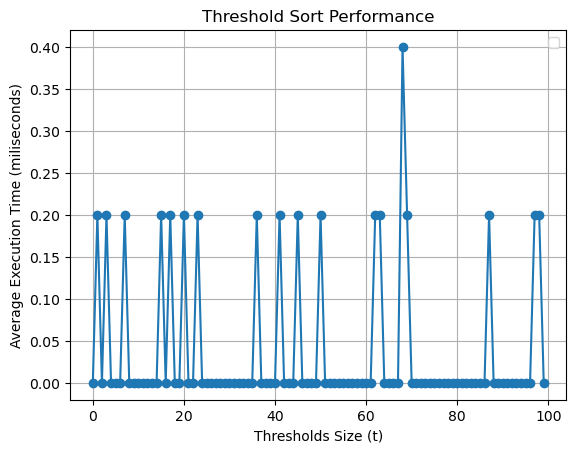

In [13]:
import matplotlib.pyplot as plt
# 데이터를 그래프로 그려주는 라이브러리 설치 필요
# 결과 그래프 그리기
'''
    그래프 정보
    배열의 크기: 500, 임계값: 0-(100 - 1) 반복횟수: 5        
'''
# x, y 각 데이터는 list 혹은 Numpy array 형태여야 한다.
thresholds = list(range(len(threshold_used_sort_average)))
plt.plot(thresholds, threshold_used_sort_average, marker='o')
plt.xlabel('Thresholds Size (t)')
plt.ylabel('Average Execution Time (miliseconds)')
plt.title('Threshold Sort Performance')
plt.legend()
plt.grid(True)
plt.show()